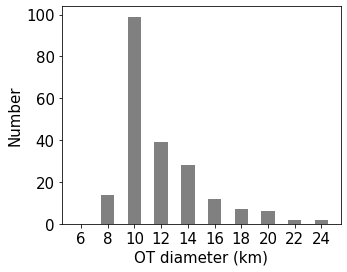

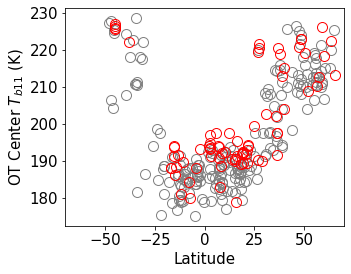

In [10]:
def read_text(fname):
    fo=open(fname,'r') #create file object
    headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

# this script is to plot OT diameter and OT bt distributions. OTs are selected from A-train year of 2007 and 2008 
import glob
import numpy as np
import matplotlib.pyplot as plt

data_dir='/data/keeling/a/yulanh/mydata/OT_modis/OT_candidates_Atrain/'

fnames=glob.glob(data_dir+'*.txt')
fontsz=15
all_lat=np.empty((0),'f')
all_bt11=np.empty((0),'f')
all_size=np.empty((0),'f')
all_OTflag=np.empty((0),'f')

for fname in fnames:
    data=read_text(fname)
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)

    # transfer data from string to float
    dataT=np.zeros((Nrow,Ncol-1),'f')

    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
        for j in range(len(splitcol)):
            if splitcol[j] != '' and len(splitcol[j]) != 46:
                dataT[i,k]=float(splitcol[j])
                k=k+1
    lon=dataT[:,0]
    lat=dataT[:,1]
    size=dataT[:,2]
    OT_minBT11=dataT[:,3]
    OT_minBT67=dataT[:,5]
    OT_meanBT11=dataT[:,4]
    OT_meanBT67=dataT[:,6]
    ci_lfBT11=dataT[:,7]
    ci_rtBT11=dataT[:,8]
    trop_temp_er5=dataT[:,9]
    trop_temp_merra=dataT[:,10]
    trop_ss_b3=dataT[:,11]
    trop_ss_a1=dataT[:,12]
    trop_ss_a2=dataT[:,13]
    trop_ss_a3=dataT[:,14]
    trop_wv_a2=dataT[:,16]
    OT_flag=dataT[:,18]

    all_lat=np.append(all_lat,lat)
    all_bt11=np.append(all_bt11,OT_minBT11)
    all_size=np.append(all_size,size)
    all_OTflag=np.append(all_OTflag,OT_flag)
    
OT_minBT11_1=all_bt11[all_OTflag == 1]
NOT_minBT11_1=all_bt11[all_OTflag == 0]
all_size_1 = all_size[all_OTflag == 1]
lat_1=all_lat[all_OTflag == 1]
Nlat_1=all_lat[all_OTflag == 0]

his=np.histogram(all_size_1,bins=10,range=(5,25))
OT_dis=his[0]
his_x=his[1]
width=1
x=np.arange(len(OT_dis))*2+6
fig,ax=plt.subplots(figsize=[5,4])
b=ax.bar(x,OT_dis,width,color='grey')
ax.set_xticks(x)
ax.set_xlabel('OT diameter (km)',size=fontsz)
ax.set_ylabel('Number',size=fontsz)
ax.tick_params(labelsize=fontsz)

fig,ax=plt.subplots(figsize=[5,4])
p=ax.plot(lat_1,OT_minBT11_1,'o',color='grey',linewidth=2,markersize=10,mfc='none')
p1=ax.plot(Nlat_1,NOT_minBT11_1,'o',color='red',linewidth=2,markersize=10,mfc='none')
ax.set_xlim([-70,70])
ax.set_xlabel('Latitude',size=fontsz)
ax.set_ylabel('OT Center $T_{b11}$ (K)',size=fontsz)
ax.tick_params(labelsize=fontsz)

In [11]:
his=np.histogram(all_size_1,bins=10,range=(5,25))
OT_dis=his[0]
his_x=his[1]
print(his_x.shape,OT_dis.shape)
x=np.arange(len(OT_dis))*2+6
print(x)
print(his_x)
print(np.sum(OT_dis))
print(len(all_size_1),len(Nlat_1))
ind=np.where(all_size_1 <= 20)[0]
print(len(ind),len(ind)/209)

(11,) (10,)
[ 6  8 10 12 14 16 18 20 22 24]
[ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25.]
209
209 78
205 0.9808612440191388
